In [105]:
import paho.mqtt.client as mqtt
from datetime import datetime
import csv  

header = ['Vaxt',
          'Mexaniki göstərici - VmT(m3)',
          'VmD - VmD(m3)',
          'Elektron göstərici - VbT(m3)',
          'VbD - VbD(m3)',
          'Ölçmə şəraitində sərfiyyat - Qm(m3/h)',
          'Baza şəraitində sərfiyyat - Qb(m3/h)',
          'Təzyiq - p(bar)',
          'Temperatur - T(C)',
          'Korreksiya əmsalı - C',
          'Qazın sıxılma əmsalı - K',
          'Baza şəraitində xüsusi çəki - Rhob(kg/m3)']

with open('C:/Users/HP/Documents/Nərimanov EK-220.csv', mode='w', encoding='utf-16', newline = '') as file:
    writer = csv.writer(file)
    writer.writerow(header)

def on_connect(client, userdata, flags, rc):
    print("Connected with result code " + str(rc))
    client.subscribe('ek220', qos = 0)

def on_log(client, userdata, level, buff):
    print(buff)
    
def on_message(client, userdata, msg):
    print(msg.topic + " " + str(msg.payload))
    data = []
    string = str(msg.payload)
    string = string[3:len(string)-2]   
    my_list = string.split(',')  
    now = datetime.now()
    time = now.strftime("%Y-%m-%d %H:%M:%S")
    data.append(time)
    for i in range(len(my_list)):
        if i in [1, 2, 3, 4, 6, 7, 8]:
            if my_list[i][5:len(my_list[i])-1] == '':
                data.append(None)
            else:
                data.append(float(my_list[i][5:len(my_list[i])-1]))
        elif i in [9, 10, 11, 12]:
            if my_list[i][6:len(my_list[i])-1] == '':
                data.append(None)
            else:
                data.append(float(my_list[i][6:len(my_list[i])-1]))
    with open('C:/Users/HP/Documents/Nərimanov EK-220.csv', mode='a', encoding='utf-16', newline = '') as file:
        writer = csv.writer(file)
        writer.writerow(data)
    
client = mqtt.Client("Erturk")
client.username_pw_set(username = "demomqtt", password = "demomqtt")
client.on_log = on_log
client.on_connect = on_connect
client.on_message = on_message

print("Connecting to broker.")
try:
    client.connect(host = "192.168.14.215", port = 1883, keepalive = 60, bind_address = "")
except:
    print("Connection failed!")
    exit(1)

client.loop_forever()

Connecting to broker.
Sending CONNECT (u1, p1, wr0, wq0, wf0, c1, k60) client_id=b'Erturk'
Received CONNACK (0, 0)
Connected with result code 0
Sending SUBSCRIBE (d0, m1) [(b'ek220', 0)]
Received SUBACK
Received PUBLISH (d0, q0, r0, m0), 'ek220', ...  (437 bytes)
ek220 b'{"1":"14.04.22.20 14:29:02","2":"191045.8400","3":"0.0","4":"195039.3389","5":"0.0","6":"24","7":"41.4000","8":"42.6100","9":"1.0595","10":"24.6400","11":"1.0294","12":"0.9999","13":"0.8313","14":"Nerimanov","15":"0","16":"0","17":"0","18":"0","19":"0","20":"0","21":"0","22":"0","23":"0","24":"0","25":"0","26":"45056","27":"4096","28":"40960","29":"0","30":"32768","31":"8192","32":"8192","33":"0","34":"0","35":"0","36":"0","37":"31"}'
Received PUBLISH (d0, q0, r0, m0), 'ek220', ...  (437 bytes)
ek220 b'{"1":"14.04.22.20 14:29:24","2":"191046.1400","3":"0.0","4":"195039.6466","5":"0.0","6":"24","7":"45.3000","8":"46.4300","9":"1.0551","10":"24.6500","11":"1.0250","12":"1.0000","13":"0.8313","14":"Nerimanov","15":"0","16

KeyboardInterrupt: 

In [14]:
import pandas as pd
df = pd.read_csv('C:/Users/HP/Documents/Nərimanov EK-220.csv', encoding='utf-16')
df['Vaxt']= pd.to_datetime(df['Vaxt'])
df.head(10)

,Vaxt,Mexaniki göstərici - VmT(m3),VmD - VmD(m3),Elektron göstərici - VbT(m3),VbD - VbD(m3),Ölçmə şəraitində sərfiyyat - Qm(m3/h),Baza şəraitində sərfiyyat - Qb(m3/h),Təzyiq - p(bar),Temperatur - T(C),Korreksiya əmsalı - C,Qazın sıxılma əmsalı - K,Baza şəraitində xüsusi çəki - Rhob(kg/m3)
0,2022-04-13 17:57:39,190874.44,0.0,194857.9783,0.0,37.1,38.78,1.0533,18.34,1.0455,0.9999,0.8313
1,2022-04-13 17:58:01,190874.64,0.0,194858.1878,0.0,37.4,39.13,1.0540,18.31,1.0464,0.9999,0.8313
2,2022-04-13 17:58:22,190874.94,0.0,194858.5027,0.0,37.4,39.34,1.0595,18.27,1.0520,0.9998,0.8313
3,2022-04-13 17:58:44,190875.14,0.0,194858.7118,0.0,37.4,39.25,1.0569,18.26,1.0495,0.9998,0.8313
4,2022-04-13 17:59:05,190875.34,0.0,194858.9218,0.0,37.1,38.93,1.0567,18.22,1.0495,0.9998,0.8313
5,2022-04-13 17:59:27,190875.64,0.0,194859.2358,0.0,42.3,44.35,1.0556,18.16,1.0486,0.9999,0.8313
6,2022-04-13 17:59:49,190875.84,0.0,194859.4451,0.0,42.6,45.34,1.0713,18.13,1.0644,0.9998,0.8313
7,2022-04-13 18:00:11,190875.84,0.0,194859.4451,0.0,12.9,13.58,1.0598,18.11,1.0530,0.9998,0.8313
8,2022-04-13 18:00:32,190875.94,0.0,194859.5505,0.0,9.3,9.80,1.0611,18.09,1.0543,0.9998,0.8313
9,2022-04-13 18:00:54,190875.94,0.0,194859.5505,0.0,9.3,9.80,1.0613,18.05,1.0546,0.9999,0.8313


In [76]:
indices = []
for i in range(len(df['Vaxt']) - 1):
    difference = df['Vaxt'][i + 1] - df['Vaxt'][i]
    if difference.total_seconds() > 75:
        indices.append(i)
        indices.append(i+1)
if len(indices) == 0:
    print('No problem!')
else:
    display(df.iloc[indices])

,Vaxt,Mexaniki göstərici - VmT(m3),VmD - VmD(m3),Elektron göstərici - VbT(m3),VbD - VbD(m3),Ölçmə şəraitində sərfiyyat - Qm(m3/h),Baza şəraitində sərfiyyat - Qb(m3/h),Təzyiq - p(bar),Temperatur - T(C),Korreksiya əmsalı - C,Qazın sıxılma əmsalı - K,Baza şəraitində xüsusi çəki - Rhob(kg/m3)
573,2022-04-13 21:26:44,190906.34,0.0,194891.8980,0.0,0.0,0.00,1.0602,10.88,1.0804,0.9996,0.8313
574,2022-04-13 21:28:08,190906.34,0.0,194891.8980,0.0,0.0,0.00,1.0602,10.86,1.0805,0.9995,0.8313
2386,2022-04-14 08:26:51,190915.64,0.0,194902.1940,0.0,23.9,25.88,1.0620,10.65,1.0832,0.9995,0.8313
2387,2022-04-14 08:28:12,190916.40,0.0,194902.4525,0.0,18.3,19.81,1.0622,10.76,1.0829,0.9996,0.8313


In [17]:
df.isnull().any()

Vaxt                                         False
Mexaniki göstərici - VmT(m3)                 False
VmD - VmD(m3)                                False
Elektron göstərici - VbT(m3)                 False
VbD - VbD(m3)                                False
Ölçmə şəraitində sərfiyyat - Qm(m3/h)        False
Baza şəraitində sərfiyyat - Qb(m3/h)         False
Təzyiq - p(bar)                              False
Temperatur - T(C)                            False
Korreksiya əmsalı - C                        False
Qazın sıxılma əmsalı - K                     False
Baza şəraitində xüsusi çəki - Rhob(kg/m3)    False
dtype: bool

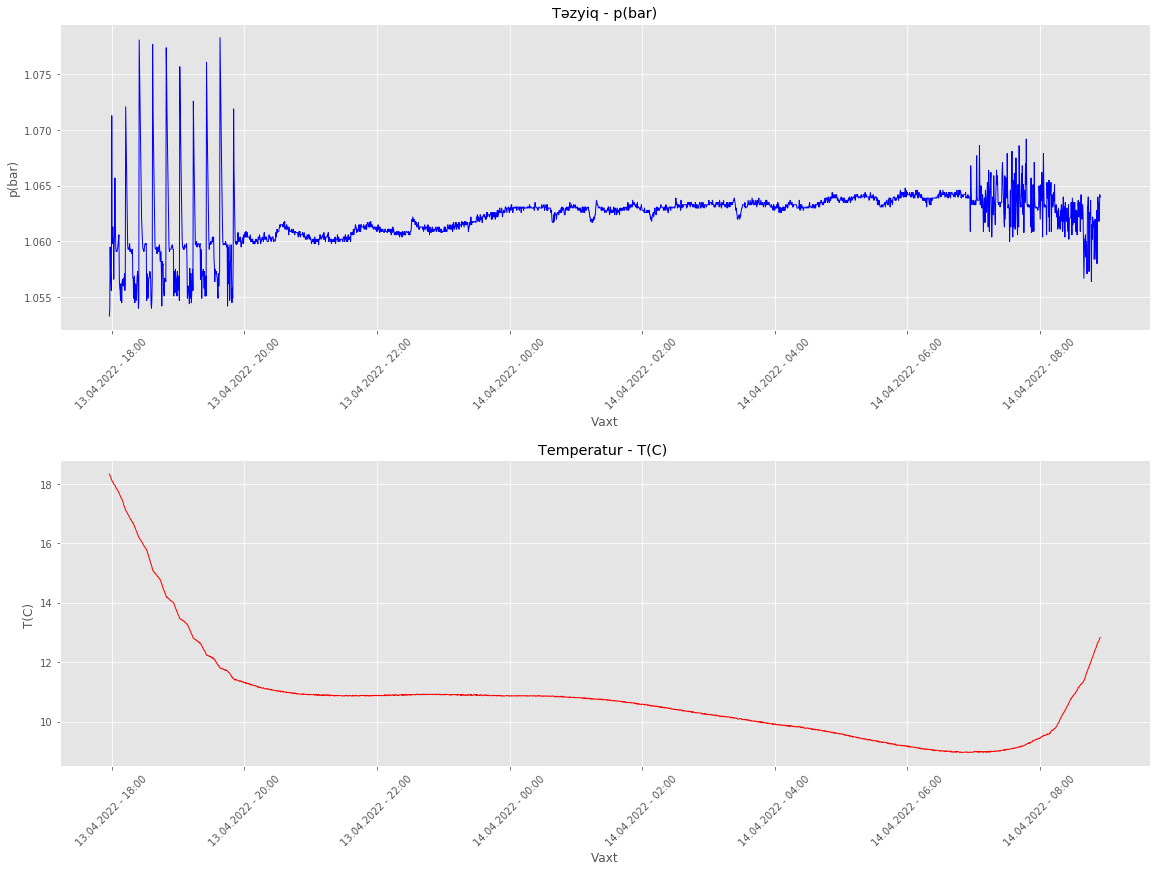

In [104]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(2, 1, constrained_layout = True, figsize = (16, 12))

ax[0].plot(df['Vaxt'], df['Təzyiq - p(bar)'], linewidth = 1, color = 'b')
ax[0].set_title('Təzyiq - p(bar)') 
ax[0].set_xlabel('Vaxt')
ax[0].set_ylabel('p(bar)')
ax[0].set_xticklabels(df['Vaxt'], rotation = 45)
ax[0].xaxis.set_major_formatter(mdates.DateFormatter("%d.%m.%Y - %H:%M"))

ax[1].plot(df['Vaxt'], df['Temperatur - T(C)'], linewidth = 1, color = 'r')
ax[1].set_title('Temperatur - T(C) ')
ax[1].set_xlabel('Vaxt')
ax[1].set_ylabel('T(C) ')
ax[1].set_xticklabels(df['Vaxt'], rotation = 45)
ax[1].xaxis.set_major_formatter(mdates.DateFormatter("%d.%m.%Y - %H:%M"))

plt.show()